In [1]:
#In this Note book, I'm going to design a neural network to destinguish diffrent types of wood!

In [2]:
#Types of the wood would be Cherry, Ash, Hickory, Walnut, Red Oak, White Oak, Mahogany, Lyptus, Hard Maple, Alder, Poplar, Knotty Pine

![title](images/woodTypes.jpg)

In [4]:
#hide
!pip install fastbook
import fastbook
fastbook.setup_book()

/opt/conda/lib/python3.7/site-packages/fastbook/__init__.py:18: UserWarning: Missing `graphviz` - please run `conda install fastbook`
  except ModuleNotFoundError: warn("Missing `graphviz` - please run `conda install fastbook`")


In [5]:
from fastbook import *

In [6]:
from bing_image_downloader import downloader

In [7]:
woodTypes = 'Cherry', 'Ash', 'Hickory', 'Walnut', 'Red Oak', 'White Oak', 'Mahogany', 'Lyptus', 'Hard Maple', 'Alder', 'Poplar', 'Knotty Pine'

In [8]:
path = Path('woodTypesImg')

In [9]:
fns = get_image_files(path)
fns

(#1200) [Path('woodTypesImg/Red Oak/Red Oak wood type/Image_19.jpg'),Path('woodTypesImg/Red Oak/Red Oak wood type/Image_60.jpg'),Path('woodTypesImg/Red Oak/Red Oak wood type/Image_59.png'),Path('woodTypesImg/Red Oak/Red Oak wood type/Image_41.JPG'),Path('woodTypesImg/Red Oak/Red Oak wood type/Image_15.jpg'),Path('woodTypesImg/Red Oak/Red Oak wood type/Image_73.jpg'),Path('woodTypesImg/Red Oak/Red Oak wood type/Image_99.jpg'),Path('woodTypesImg/Red Oak/Red Oak wood type/Image_84.jpg'),Path('woodTypesImg/Red Oak/Red Oak wood type/Image_57.jpg'),Path('woodTypesImg/Red Oak/Red Oak wood type/Image_44.jpg')...]

In [32]:
for w in woodTypes:
    dest = path/w
    dest.mkdir(exist_ok=true)
    downloader.download(w+" wood type", limit=100, output_dir=dest, force_replace=False, timeout=60)



[!!]Indexing page: 1

[%] Indexed 100 Images on Page 1.


[%] Downloading Image #1 from https://www.homestratosphere.com/wp-content/uploads/2019/01/1-26-1-3.jpg
[%] File Downloaded !

[%] Downloading Image #2 from https://www.homestratosphere.com/wp-content/uploads/2019/01/7-26-1-2.jpg
[%] File Downloaded !

[%] Downloading Image #3 from https://s3-production.bobvila.com/pages/46483/cover/cherry-wood.jpg?1439913377
[%] File Downloaded !

[%] Downloading Image #4 from https://www.dutchcrafters.com/video/wp-content/uploads/2019/10/Cherry-Darkened.jpg
[%] File Downloaded !

[%] Downloading Image #5 from https://images-na.ssl-images-amazon.com/images/I/51ycLHy2WkL.jpg
[%] File Downloaded !

[%] Downloading Image #6 from https://www.homestratosphere.com/wp-content/uploads/2019/01/6-26-1-3.jpg
[%] File Downloaded !

[%] Downloading Image #7 from https://crlumber.com/wp-content/uploads/2019/07/wood-type-domestic-cherry.jpg
[Error]Invalid image, not saving https://crlumber.com/wp-content/upl

In [10]:
badData = verify_images(fns)
badData

(#0) []

In [11]:
types = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128))

In [14]:
dls = types.dataloaders(path)

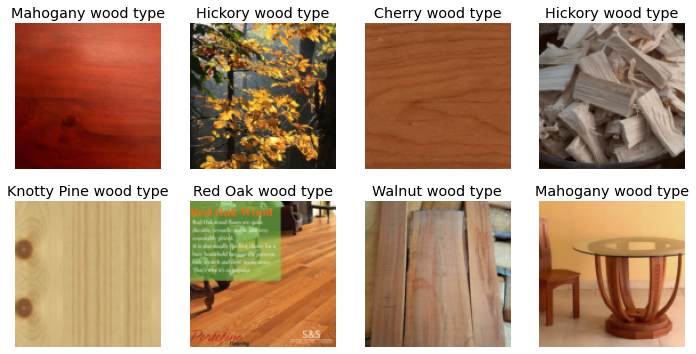

In [15]:
dls.valid.show_batch(max_n=8, nrows=2)

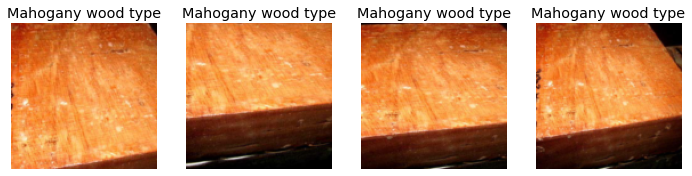

In [16]:
types = types.new(item_tfms=RandomResizedCrop(128, min_scale=0.3))
dls = types.dataloaders(path)
dls.train.show_batch(max_n=4, nrows=1, unique=True)

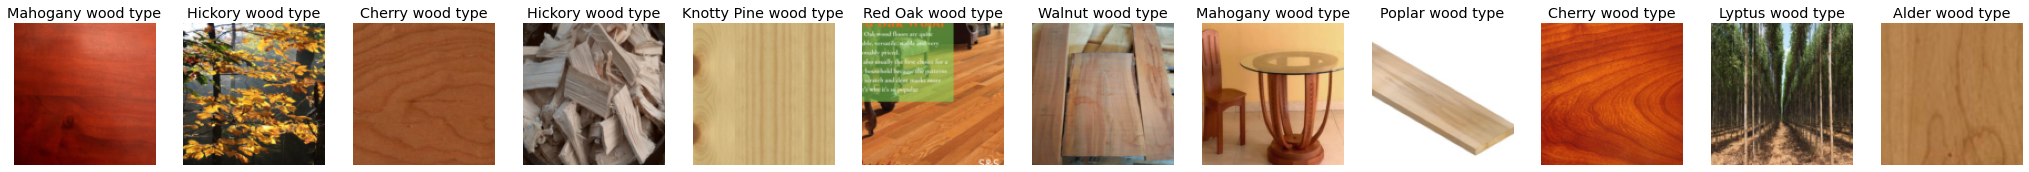

In [19]:
dls.valid.show_batch(max_n=12, nrows=1)

In [22]:
learn = cnn_learner(dls, resnet18, metrics= error_rate)
learn.fine_tune(16)

epoch,train_loss,valid_loss,error_rate,time
0,3.723195,2.696921,0.829167,00:08


epoch,train_loss,valid_loss,error_rate,time
0,2.969956,2.482171,0.783333,00:08
1,2.714850,2.414729,0.737500,00:08
2,2.504940,2.420473,0.695833,00:07
3,2.335139,2.354662,0.675000,00:08
4,2.126854,2.329027,0.616667,00:08
5,1.929015,2.474813,0.645833,00:08
6,1.714285,2.423883,0.616667,00:07
7,1.521727,2.531772,0.608333,00:08
8,1.350741,2.465631,0.591667,00:07
9,1.224513,2.505437,0.579167,00:08
